In [167]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


In [116]:
# Load and Inspect the Data
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\spotify\Spotify.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [117]:
#Check the shape of the dataset (number of rows and columns)
df.shape

(114000, 21)

In [118]:
#Display the column names
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [119]:
#Display the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [120]:
#remove that coulmn named "Unnamed"
df = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\spotify\Spotify.csv", index_col=0)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [121]:
#Check data
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [122]:
#Check for missing values in each column
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

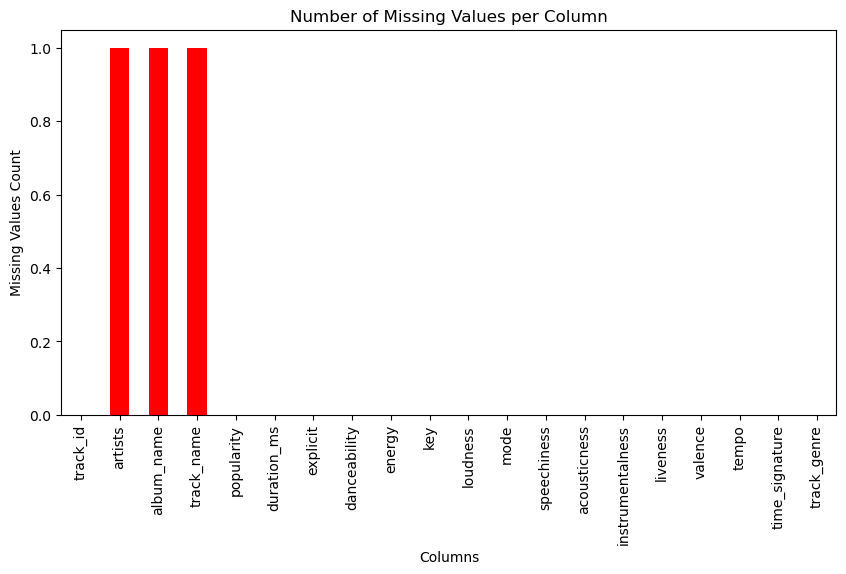

In [123]:
#Check for missing values in each column
df.isnull().sum().plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)
plt.show()


In [125]:
#Handle missing values:Fill missing `artist_name` with "Unknown".
df['artists'].fillna('Unknown', inplace=True)  
df.dropna(subset=['popularity', 'duration_ms'], inplace=True) 
df


C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\643178277.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


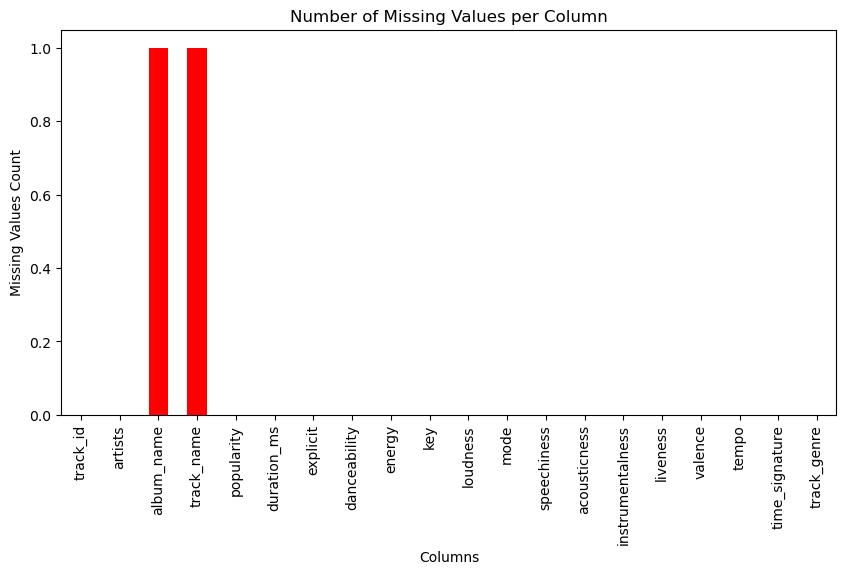

In [126]:
#Check for missing values in each column
df.isnull().sum().plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)
plt.show()

In [127]:
#check that the missing value in artists is replaced
df[df["artists"]=="Unknown"]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,Unknown,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [ ]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [131]:
#remove nan
df.dropna(inplace=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

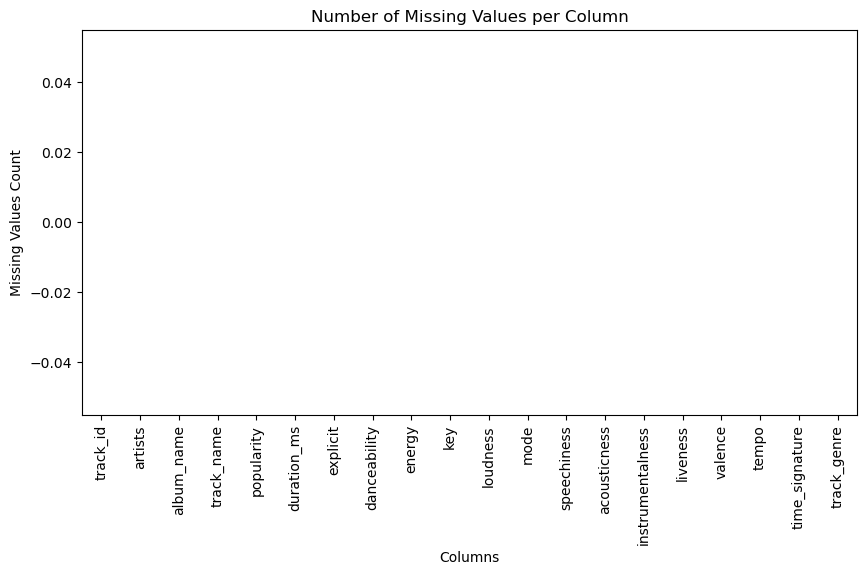

In [133]:
#Check for missing values in each column
df.isnull().sum().plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)
plt.show()

In [134]:
#Remove duplicate rows based on `track_name` and `artist_name`
df.duplicated().sum()

450

In [135]:
df[df.duplicated()]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [136]:
df.drop_duplicates(inplace=True)


In [137]:
df.duplicated().sum()

0

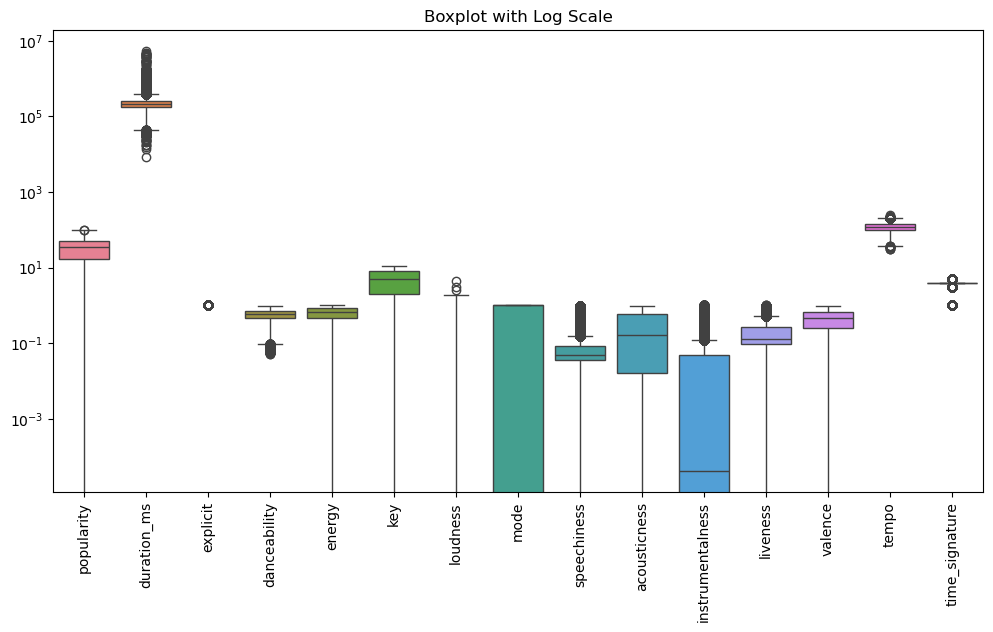

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.yscale("log")  
plt.xticks(rotation=90)
plt.title("Boxplot with Log Scale")
plt.show()


In [139]:
#get outliers
def detect_outliers(df):
    outliers_dict = {}  
    for column in df.select_dtypes(include='number').columns:  
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outliers_dict[column] = outlier_indices.tolist()  

    return outliers_dict

outliers_dict = detect_outliers(df)
outliers_df = pd.DataFrame([(col, idx) for col, indices in outliers_dict.items() for idx in indices], columns=['Column', 'Outlier_Index'])
outliers_df



,Column,Outlier_Index
0,popularity,20001
1,popularity,81051
2,duration_ms,253
3,duration_ms,650
4,duration_ms,752
...,...,...
71905,time_signature,113965
71906,time_signature,113990
71907,time_signature,113993
71908,time_signature,113994


In [140]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

             Feature  Outlier Percentage
0         popularity                0.00
1        duration_ms                4.92
2       danceability                0.54
3             energy                0.00
4                key                0.00
5           loudness                5.39
6               mode                0.00
7        speechiness               11.60
8       acousticness                0.00
9   instrumentalness               22.13
10          liveness                7.58
11           valence                0.00
12             tempo                0.54
13    time_signature               10.62


In [262]:
#not the best way
#df.drop(outliers_df['Outlier_Index'].unique(), inplace=True)
#df

In [141]:
df.shape

(113549, 20)

In [142]:
#Replace outliers with mean
for column in df.select_dtypes(include=['number']).columns:  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean_value = df[column].mean() 
    
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value

df    


C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\568214471.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.32443262380118' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\568214471.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '228081.37084430511' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\568214471.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.30945230693357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\568214471.py:11: FutureWarning:

Setti

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746000,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.000000,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235000,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.000000,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734000,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.000000,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-8.243408,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.904218,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681000,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.000000,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,False,0.172,0.2350,5.0,-16.393000,1.0,0.0422,0.6400,0.155703,0.0863,0.0339,125.995,3.904218,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,False,0.174,0.1170,0.0,-8.243408,0.0,0.0401,0.9940,0.155703,0.1050,0.0350,85.239,4.000000,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,False,0.629,0.3290,0.0,-10.895000,0.0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.000000,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41.0,283893.0,False,0.587,0.5060,7.0,-10.889000,1.0,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.000000,world-music


In [143]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

             Feature  Outlier Percentage
0         popularity                0.00
1        duration_ms                2.56
2       danceability                0.09
3             energy                0.00
4                key                0.00
5           loudness                2.39
6               mode                0.00
7        speechiness                0.00
8       acousticness                0.00
9   instrumentalness               22.13
10          liveness                4.21
11           valence                0.00
12             tempo                0.02
13    time_signature               10.62


In [144]:
df.nunique()

track_id            89740
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         46350
explicit                2
danceability          904
energy               2083
key                    12
loudness            15097
mode                    2
speechiness           838
acousticness         5061
instrumentalness     4468
liveness             1261
valence              1790
tempo               45353
time_signature          2
track_genre           114
dtype: int64

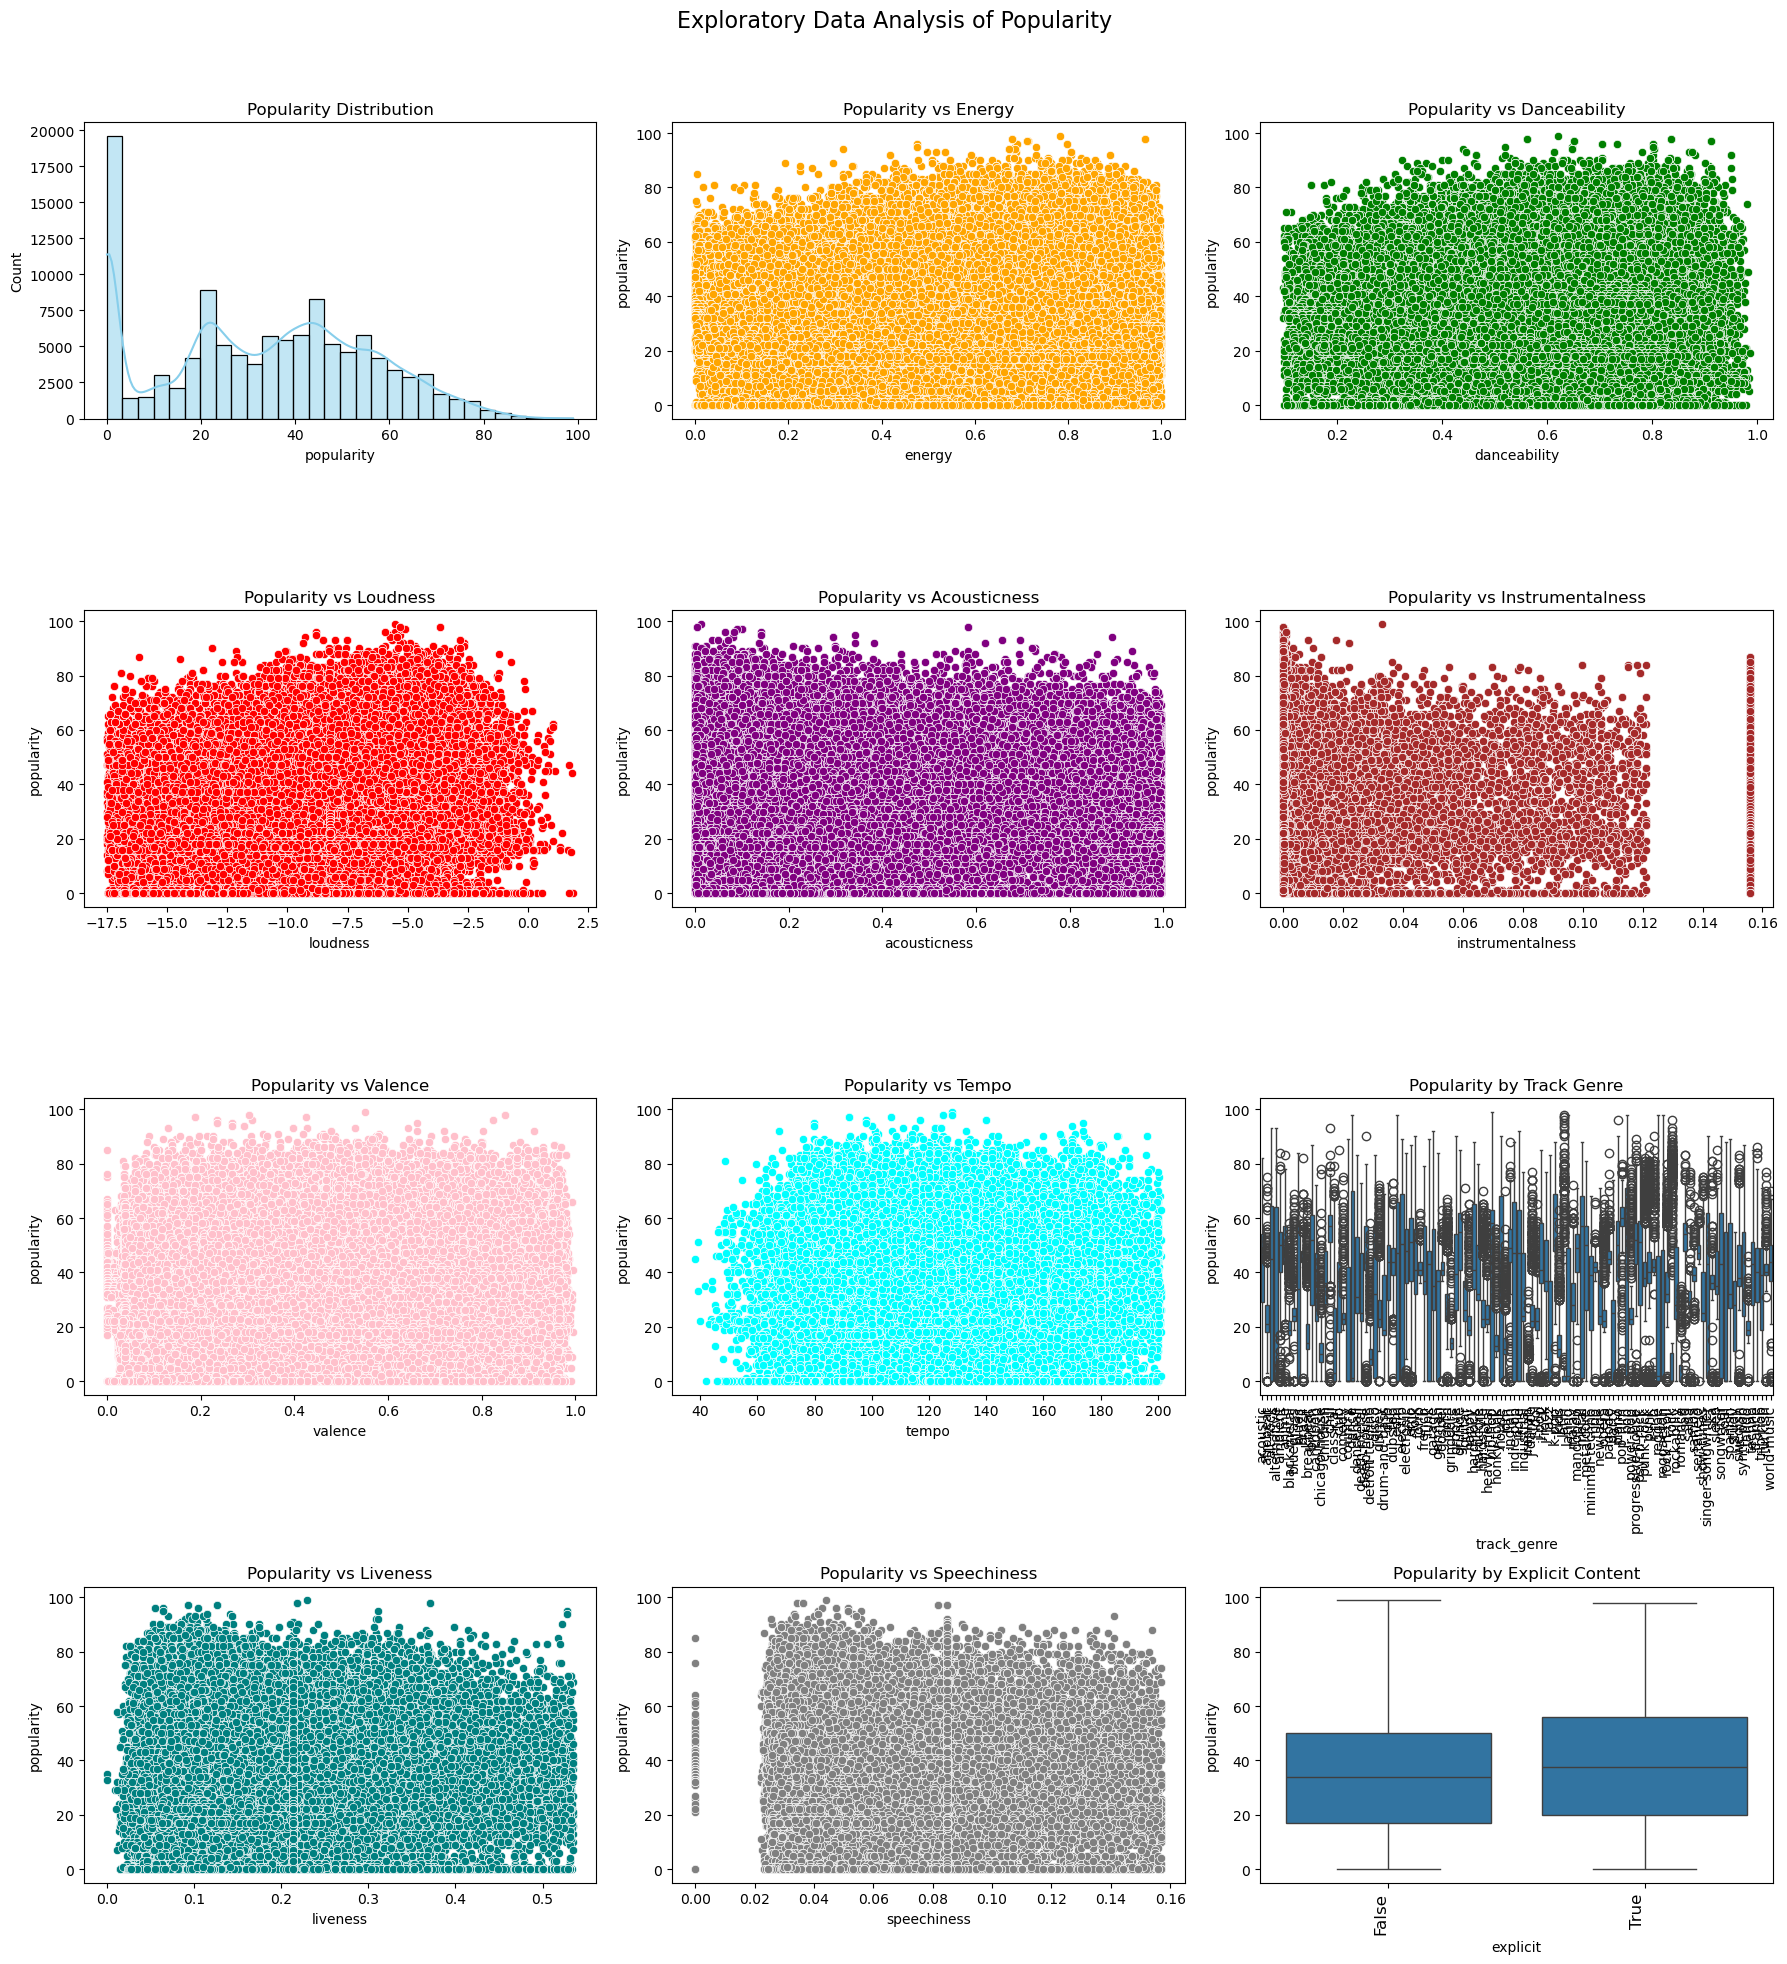

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle("Exploratory Data Analysis of Popularity", fontsize=16)

sns.histplot(df["popularity"], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("Popularity Distribution")


sns.scatterplot(data=df, x="energy", y="popularity", ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Popularity vs Energy")


sns.scatterplot(data=df, x="danceability", y="popularity", ax=axes[0, 2], color="green")
axes[0, 2].set_title("Popularity vs Danceability")


sns.scatterplot(data=df, x="loudness", y="popularity", ax=axes[1, 0], color="red")
axes[1, 0].set_title("Popularity vs Loudness")


sns.scatterplot(data=df, x="acousticness", y="popularity", ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Popularity vs Acousticness")


sns.scatterplot(data=df, x="instrumentalness", y="popularity", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Popularity vs Instrumentalness")


sns.scatterplot(data=df, x="valence", y="popularity", ax=axes[2, 0], color="pink")
axes[2, 0].set_title("Popularity vs Valence")


sns.scatterplot(data=df, x="tempo", y="popularity", ax=axes[2, 1], color="cyan")
axes[2, 1].set_title("Popularity vs Tempo")


sns.boxplot(data=df, x="track_genre", y="popularity", ax=axes[2, 2])
axes[2, 2].set_title("Popularity by Track Genre")
axes[2, 2].tick_params(axis='x', rotation=90)  
plt.xticks(fontsize=12, rotation=90, ha="right")  


sns.scatterplot(data=df, x="liveness", y="popularity", ax=axes[3, 0], color="teal")
axes[3, 0].set_title("Popularity vs Liveness")


sns.scatterplot(data=df, x="speechiness", y="popularity", ax=axes[3, 1], color="gray")
axes[3, 1].set_title("Popularity vs Speechiness")


sns.boxplot(data=df, x="explicit", y="popularity", ax=axes[3, 2])
axes[3, 2].set_title("Popularity by Explicit Content")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


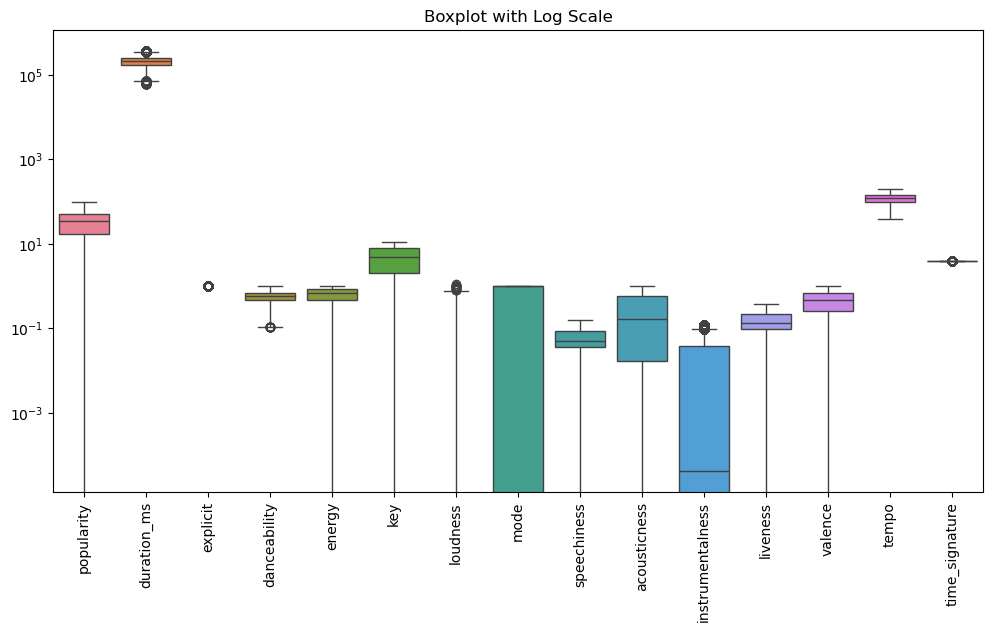

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.yscale("log")  
plt.xticks(rotation=90)
plt.title("Boxplot with Log Scale")
plt.show()

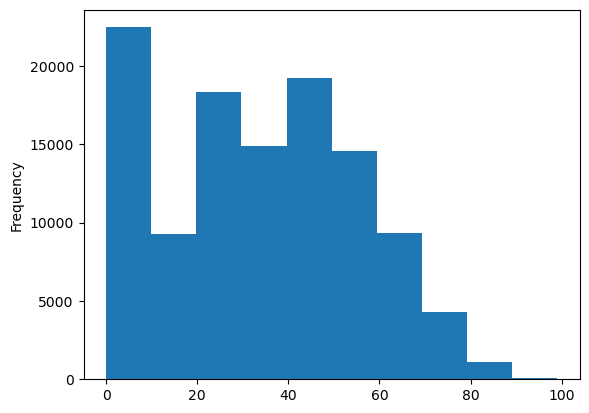

In [145]:
#Plot a histogram of `popularity`

df['popularity'].plot.hist()
plt.show()

In [146]:
#Calculate and display the mean, median, and standard deviation of `popularity`
df["popularity"].describe()[["mean","std","50%"]]

mean    33.323258
std     22.282098
50%     35.000000
Name: popularity, dtype: float64

In [147]:
#put target column data in last column
new = df['popularity']
df.drop(columns=['popularity'], axis=1, inplace=True)
df['popularity'] = new
df

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666.0,False,0.676,0.4610,1.0,-6.746000,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.000000,acoustic,73.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610.0,False,0.420,0.1660,1.0,-17.235000,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.000000,acoustic,55.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826.0,False,0.438,0.3590,0.0,-9.734000,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.000000,acoustic,57.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933.0,False,0.266,0.0596,0.0,-8.243408,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.904218,acoustic,71.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853.0,False,0.618,0.4430,2.0,-9.681000,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.000000,acoustic,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999.0,False,0.172,0.2350,5.0,-16.393000,1.0,0.0422,0.6400,0.155703,0.0863,0.0339,125.995,3.904218,world-music,21.0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000.0,False,0.174,0.1170,0.0,-8.243408,0.0,0.0401,0.9940,0.155703,0.1050,0.0350,85.239,4.000000,world-music,22.0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466.0,False,0.629,0.3290,0.0,-10.895000,0.0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.000000,world-music,22.0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893.0,False,0.587,0.5060,7.0,-10.889000,1.0,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.000000,world-music,41.0


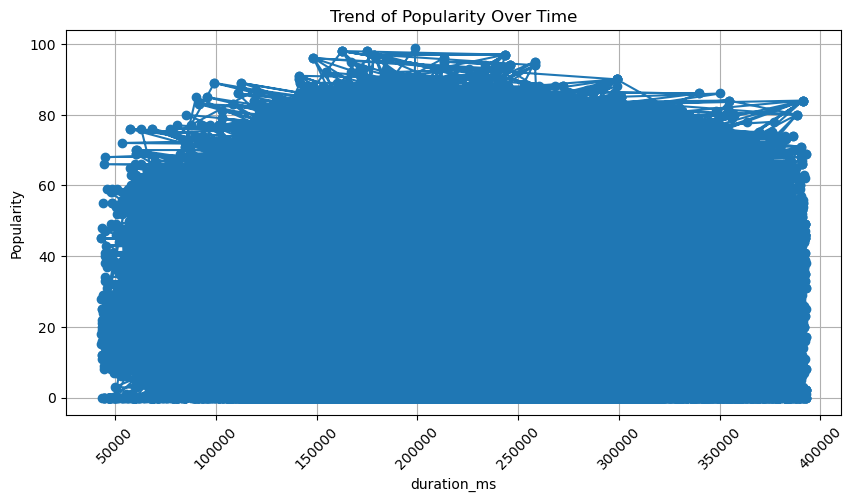

In [148]:
#- Plot a line chart showing the trend over time.
plt.figure(figsize=(10,5))
plt.plot(df['duration_ms'], df['popularity'], marker='o', linestyle='-')

plt.xlabel('duration_ms')
plt.ylabel('Popularity')
plt.title('Trend of Popularity Over Time')
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()


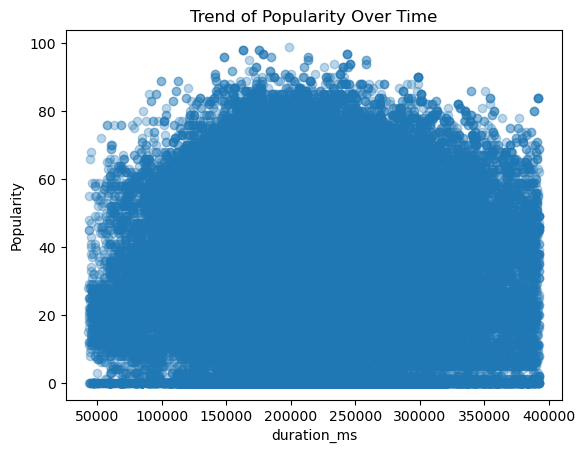

In [35]:
#- Plot a line chart showing the trend over time.
plt.scatter(df['duration_ms'], df['popularity'], alpha=0.3)
plt.xlabel('duration_ms')
plt.ylabel('Popularity')
plt.title('Trend of Popularity Over Time')
#plt.grid(True)
plt.show()


In [149]:
#Count the number of songs per artist.

number_of_songs= df['artists'].value_counts(ascending=False)
number_of_songs

artists
The Beatles                      279
George Jones                     260
Stevie Wonder                    235
Linkin Park                      224
Ella Fitzgerald                  221
                                ... 
Mr. Probz;Robin Schulz             1
Keanu Silva;Jhn McFly;Marissa      1
Alan Walker;Hans Zimmer            1
Triplo Max                         1
Jesus Culture                      1
Name: count, Length: 31437, dtype: int64

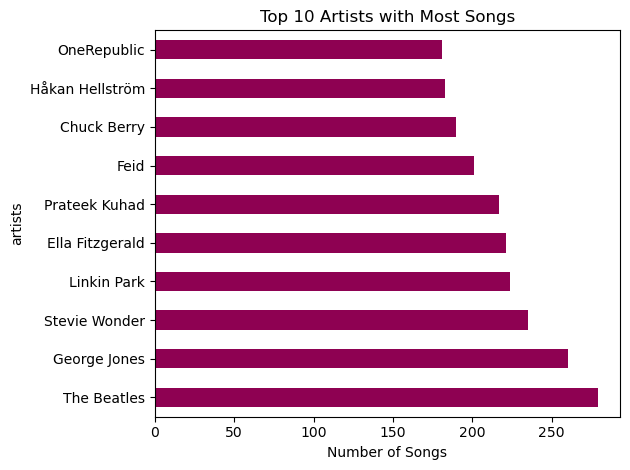

In [150]:
#Plot a horizontal bar chart for the top 10 artists.

number_of_songs[:10].plot(kind='barh',cmap="PiYG")
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Number of Songs')
plt.tight_layout()
plt.show()

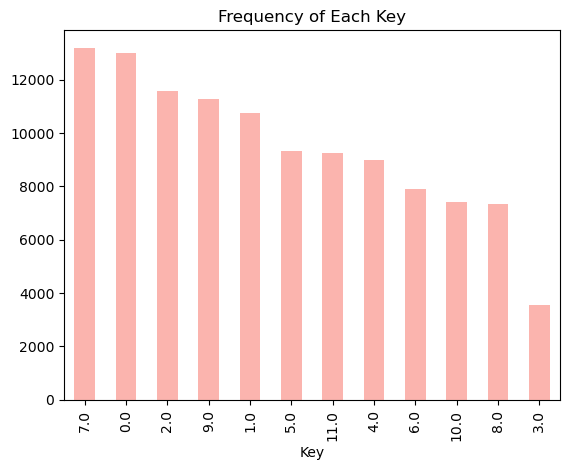

In [151]:
#- Plot a bar chart for the frequency of each `key`.

key_counts = df['key'].value_counts()
key_counts.plot(kind='bar',cmap="Pastel1")
plt.title('Frequency of Each Key')
plt.xlabel('Key')
plt.show()

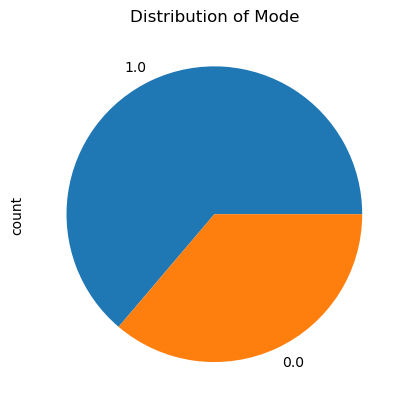

In [152]:
#- Plot a pie chart for the distribution of `mode` (major/minor).
mode_counts = df['mode'].value_counts()
mode_counts.plot(kind='pie')
plt.title('Distribution of Mode')
plt.show()


In [153]:
mode_counts = df['mode'].value_counts()
fig = px.pie(
    names=mode_counts.index,
    values=mode_counts.values,
    title='Distribution of Mode',
    color=mode_counts.index,  
    color_discrete_map={'major': 'pink', 'minor': 'black'}  
)

fig.show()

In [154]:
#Create a feature for the number of artists
df['num_artists'] = df['artists'].str.split(';').str.len()
print(df[['artists', 'num_artists']].head())
df

                  artists  num_artists
0             Gen Hoshino            1
1            Ben Woodward            1
2  Ingrid Michaelson;ZAYN            2
3            Kina Grannis            1
4        Chord Overstreet            1


,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,num_artists
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666.0,False,0.676,0.4610,1.0,-6.746000,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.000000,acoustic,73.0,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610.0,False,0.420,0.1660,1.0,-17.235000,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.000000,acoustic,55.0,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826.0,False,0.438,0.3590,0.0,-9.734000,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.000000,acoustic,57.0,2
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933.0,False,0.266,0.0596,0.0,-8.243408,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.904218,acoustic,71.0,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853.0,False,0.618,0.4430,2.0,-9.681000,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.000000,acoustic,82.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999.0,False,0.172,0.2350,5.0,-16.393000,...,0.0422,0.6400,0.155703,0.0863,0.0339,125.995,3.904218,world-music,21.0,1
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000.0,False,0.174,0.1170,0.0,-8.243408,...,0.0401,0.9940,0.155703,0.1050,0.0350,85.239,4.000000,world-music,22.0,1
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466.0,False,0.629,0.3290,0.0,-10.895000,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.000000,world-music,22.0,1
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893.0,False,0.587,0.5060,7.0,-10.889000,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.000000,world-music,41.0,1


In [155]:
# Perform one-hot encoding for `key` and `mode`.
df_encoded = pd.get_dummies(df, columns=['key', 'mode'])
print(df_encoded.head())
print(df[['key', 'mode']].head(20))

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  duration_ms  explicit  danceability  energy  \
0                      Comedy     230666.0     False         0.676  0.4610   
1            Ghost - Acoustic     149610.0     False         0.420  0.1660   
2              To Begin Again     210826.0     False         0.438  0.3590   
3  Can't Help Falling In Love   

In [156]:
categorical_columns=df.select_dtypes(include=['object', 'category']).columns
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col]).astype(int)
df

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,num_artists
0,62845,10357,8100,11741,230666.0,False,0.676,0.4610,1.0,-6.746000,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.000000,0,73.0,1
1,55667,3287,14796,22528,149610.0,False,0.420,0.1660,1.0,-17.235000,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.000000,0,55.0,1
2,19766,12397,39162,60774,210826.0,False,0.438,0.3590,0.0,-9.734000,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.000000,0,57.0,2
3,77941,14839,8580,9580,201933.0,False,0.266,0.0596,0.0,-8.243408,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.904218,0,71.0,1
4,68241,5255,16899,25689,198853.0,False,0.618,0.4430,2.0,-9.681000,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.000000,0,82.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,25198,22486,66,53329,384999.0,False,0.172,0.2350,5.0,-16.393000,...,0.0422,0.6400,0.155703,0.0863,0.0339,125.995,3.904218,113,21.0,1
113996,19583,22486,66,65090,385000.0,False,0.174,0.1170,0.0,-8.243408,...,0.0401,0.9940,0.155703,0.1050,0.0350,85.239,4.000000,113,22.0,1
113997,80126,4952,5028,38207,271466.0,False,0.629,0.3290,0.0,-10.895000,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.000000,113,22.0,1
113998,30455,18534,7238,21507,283893.0,False,0.587,0.5060,7.0,-10.889000,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.000000,113,41.0,1


In [157]:
df['explicit'] = df['explicit'].astype(int)
print(df[['explicit']].head())

   explicit
0         0
1         0
2         0
3         0
4         0


In [158]:
#Create a new column `is_popular` (1 for popular, 0 otherwise).

df['is_popular'] = (df['popularity']>70).astype(int)
df

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,num_artists,is_popular
0,62845,10357,8100,11741,230666.0,0,0.676,0.4610,1.0,-6.746000,...,0.0322,0.000001,0.3580,0.7150,87.917,4.000000,0,73.0,1,1
1,55667,3287,14796,22528,149610.0,0,0.420,0.1660,1.0,-17.235000,...,0.9240,0.000006,0.1010,0.2670,77.489,4.000000,0,55.0,1,0
2,19766,12397,39162,60774,210826.0,0,0.438,0.3590,0.0,-9.734000,...,0.2100,0.000000,0.1170,0.1200,76.332,4.000000,0,57.0,2,0
3,77941,14839,8580,9580,201933.0,0,0.266,0.0596,0.0,-8.243408,...,0.9050,0.000071,0.1320,0.1430,181.740,3.904218,0,71.0,1,1
4,68241,5255,16899,25689,198853.0,0,0.618,0.4430,2.0,-9.681000,...,0.4690,0.000000,0.0829,0.1670,119.949,4.000000,0,82.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,25198,22486,66,53329,384999.0,0,0.172,0.2350,5.0,-16.393000,...,0.6400,0.155703,0.0863,0.0339,125.995,3.904218,113,21.0,1,0
113996,19583,22486,66,65090,385000.0,0,0.174,0.1170,0.0,-8.243408,...,0.9940,0.155703,0.1050,0.0350,85.239,4.000000,113,22.0,1,0
113997,80126,4952,5028,38207,271466.0,0,0.629,0.3290,0.0,-10.895000,...,0.8670,0.000000,0.0839,0.7430,132.378,4.000000,113,22.0,1,0
113998,30455,18534,7238,21507,283893.0,0,0.587,0.5060,7.0,-10.889000,...,0.3810,0.000000,0.2700,0.4130,135.960,4.000000,113,41.0,1,0


In [159]:
def apply_scaling_if_needed(df, target_column):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # no need to apply scaling on target column
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    scaler = StandardScaler()

    for column in numeric_columns:
        unique_values = set(df[column].unique())

        if unique_values == {0, 1}:  
            print(f"No need for scaling on {column}")
        else:
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Scaling applied on {column}")

apply_scaling_if_needed(df, target_column='is_popular')

print(df)

Scaling applied on track_id
Scaling applied on artists
Scaling applied on album_name
Scaling applied on track_name
Scaling applied on duration_ms
No need for scaling on explicit
Scaling applied on danceability
Scaling applied on energy
Scaling applied on key
Scaling applied on loudness
No need for scaling on mode
Scaling applied on speechiness
Scaling applied on acousticness
Scaling applied on instrumentalness
Scaling applied on liveness
Scaling applied on valence
Scaling applied on tempo
Scaling applied on time_signature
Scaling applied on track_genre
Scaling applied on popularity
Scaling applied on num_artists
        track_id   artists  album_name  track_name  duration_ms  explicit  \
0       0.693949 -0.593437   -1.074200   -1.179625     0.246987         0   
1       0.417062 -1.372438   -0.576016   -0.664170    -1.058386         0   
2      -0.967800 -0.368661    1.236820    1.163408    -0.072528         0   
3       1.276270 -0.099592   -1.038488   -1.282888    -0.215746         

In [160]:
df

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,num_artists,is_popular
0,0.693949,-0.593437,-1.074200,-1.179625,0.246987,0,0.627470,-0.721328,-1.210476,0.208383,...,-0.849230,-0.594745,1.810570,0.928984,-1.170487,0.344766,-1.716999,1.780663,-0.449143,1
1,0.417062,-1.372438,-0.576016,-0.664170,-1.058386,0,-0.884922,-1.896382,-1.210476,-2.981978,...,1.837684,-0.594675,-0.693977,-0.799395,-1.528335,0.344766,-1.716999,0.972836,-0.449143,0
2,-0.967800,-0.368661,1.236820,1.163408,-0.072528,0,-0.778582,-1.127618,-1.491364,-0.700454,...,-0.313535,-0.594761,-0.538052,-1.366520,-1.568038,0.344766,-1.716999,1.062595,0.710442,0
3,1.276270,-0.099592,-1.038488,-1.282888,-0.215746,0,-1.794720,-2.320198,-1.491364,-0.247072,...,1.780439,-0.593662,-0.391872,-1.277786,2.049152,-2.900517,-1.716999,1.690905,-0.449143,1
4,0.902097,-1.155596,-0.419553,-0.513122,-0.265348,0,0.284819,-0.793026,-0.929587,-0.684334,...,0.466809,-0.594761,-0.870368,-1.185194,-0.071274,0.344766,-1.716999,2.184577,-0.449143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.758264,0.742986,-1.671932,0.807650,2.732457,0,-2.350051,-1.621539,-0.086922,-2.725873,...,0.982017,1.826544,-0.837234,-1.698692,0.136201,-2.900517,1.716148,-0.553059,-0.449143,0
113996,-0.974860,0.742986,-1.671932,1.369647,2.732473,0,-2.338236,-2.091561,-1.491364,-0.247072,...,2.048588,1.826544,-0.654996,-1.694449,-1.262385,0.344766,1.716148,-0.508180,-0.449143,0
113997,1.360555,-1.188982,-1.302758,0.085048,0.904054,0,0.349804,-1.247115,-1.491364,-1.053587,...,1.665948,-0.594761,-0.860622,1.037007,0.355241,0.344766,1.716148,-0.508180,-0.449143,0
113998,-0.555478,0.307539,-1.138333,-0.712958,1.104186,0,0.101678,-0.542082,0.474855,-1.051762,...,0.201673,-0.594761,0.952982,-0.236129,0.478161,0.344766,1.716148,0.344527,-0.449143,0


In [161]:
df["explicit"] = df["explicit"].astype(int)
print(df)

        track_id   artists  album_name  track_name  duration_ms  explicit  \
0       0.693949 -0.593437   -1.074200   -1.179625     0.246987         0   
1       0.417062 -1.372438   -0.576016   -0.664170    -1.058386         0   
2      -0.967800 -0.368661    1.236820    1.163408    -0.072528         0   
3       1.276270 -0.099592   -1.038488   -1.282888    -0.215746         0   
4       0.902097 -1.155596   -0.419553   -0.513122    -0.265348         0   
...          ...       ...         ...         ...          ...       ...   
113995 -0.758264  0.742986   -1.671932    0.807650     2.732457         0   
113996 -0.974860  0.742986   -1.671932    1.369647     2.732473         0   
113997  1.360555 -1.188982   -1.302758    0.085048     0.904054         0   
113998 -0.555478  0.307539   -1.138333   -0.712958     1.104186         0   
113999 -0.531485 -1.188982    0.135324   -1.454005     0.426714         0   

        danceability    energy       key  loudness  ...  acousticness  \
0 

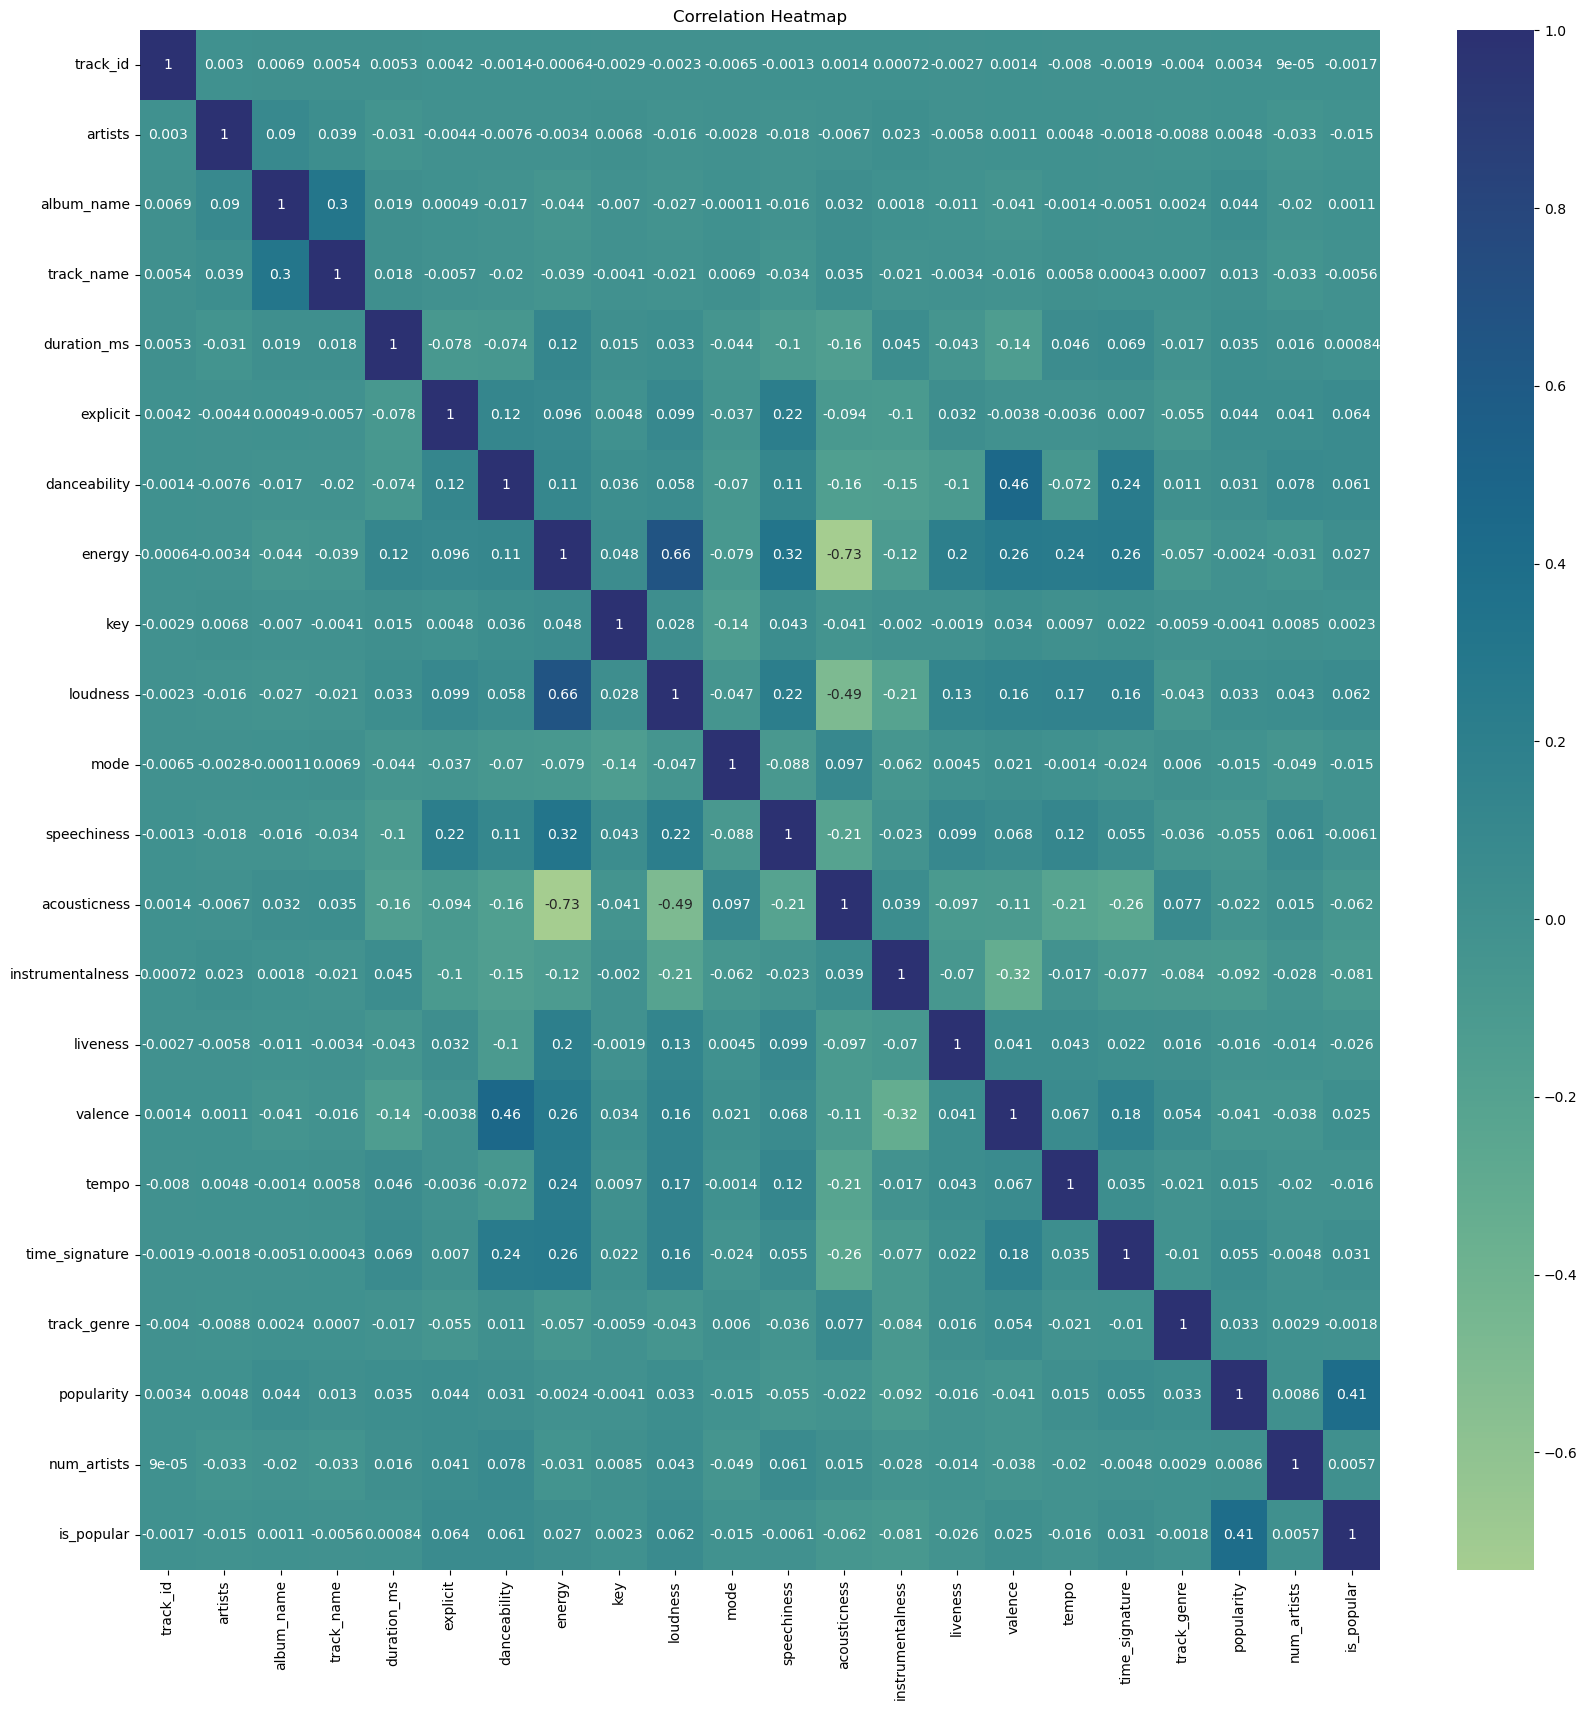

In [162]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['is_popular']
print(target_correlation)

track_id           -0.001727
artists            -0.014879
album_name          0.001139
track_name         -0.005600
duration_ms         0.000835
explicit            0.063683
danceability        0.061417
energy              0.027336
key                 0.002252
loudness            0.062491
mode               -0.014594
speechiness        -0.006109
acousticness       -0.061913
instrumentalness   -0.081020
liveness           -0.026459
valence             0.025209
tempo              -0.016022
time_signature      0.030739
track_genre        -0.001763
popularity          0.410263
num_artists         0.005709
is_popular          1.000000
Name: is_popular, dtype: float64


In [49]:
df.drop(['track_id','artists','album_name','track_name','duration_ms','speechiness','popularity','num_artists'],axis=1,inplace=True)
df

,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_popular
0,0,0.627470,-0.721328,-1.210476,0.208383,0.0,-0.849230,-0.594745,1.810570,0.928984,-1.170487,0.344766,-1.716999,1
1,0,-0.884922,-1.896382,-1.210476,-2.981978,1.0,1.837684,-0.594675,-0.693977,-0.799395,-1.528335,0.344766,-1.716999,0
2,0,-0.778582,-1.127618,-1.491364,-0.700454,1.0,-0.313535,-0.594761,-0.538052,-1.366520,-1.568038,0.344766,-1.716999,0
3,0,-1.794720,-2.320198,-1.491364,-0.247072,1.0,1.780439,-0.593662,-0.391872,-1.277786,2.049152,-2.900517,-1.716999,1
4,0,0.284819,-0.793026,-0.929587,-0.684334,1.0,0.466809,-0.594761,-0.870368,-1.185194,-0.071274,0.344766,-1.716999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0,-2.350051,-1.621539,-0.086922,-2.725873,1.0,0.982017,1.826544,-0.837234,-1.698692,0.136201,-2.900517,1.716148,0
113996,0,-2.338236,-2.091561,-1.491364,-0.247072,0.0,2.048588,1.826544,-0.654996,-1.694449,-1.262385,0.344766,1.716148,0
113997,0,0.349804,-1.247115,-1.491364,-1.053587,0.0,1.665948,-0.594761,-0.860622,1.037007,0.355241,0.344766,1.716148,0
113998,0,0.101678,-0.542082,0.474855,-1.051762,1.0,0.201673,-0.594761,0.952982,-0.236129,0.478161,0.344766,1.716148,0


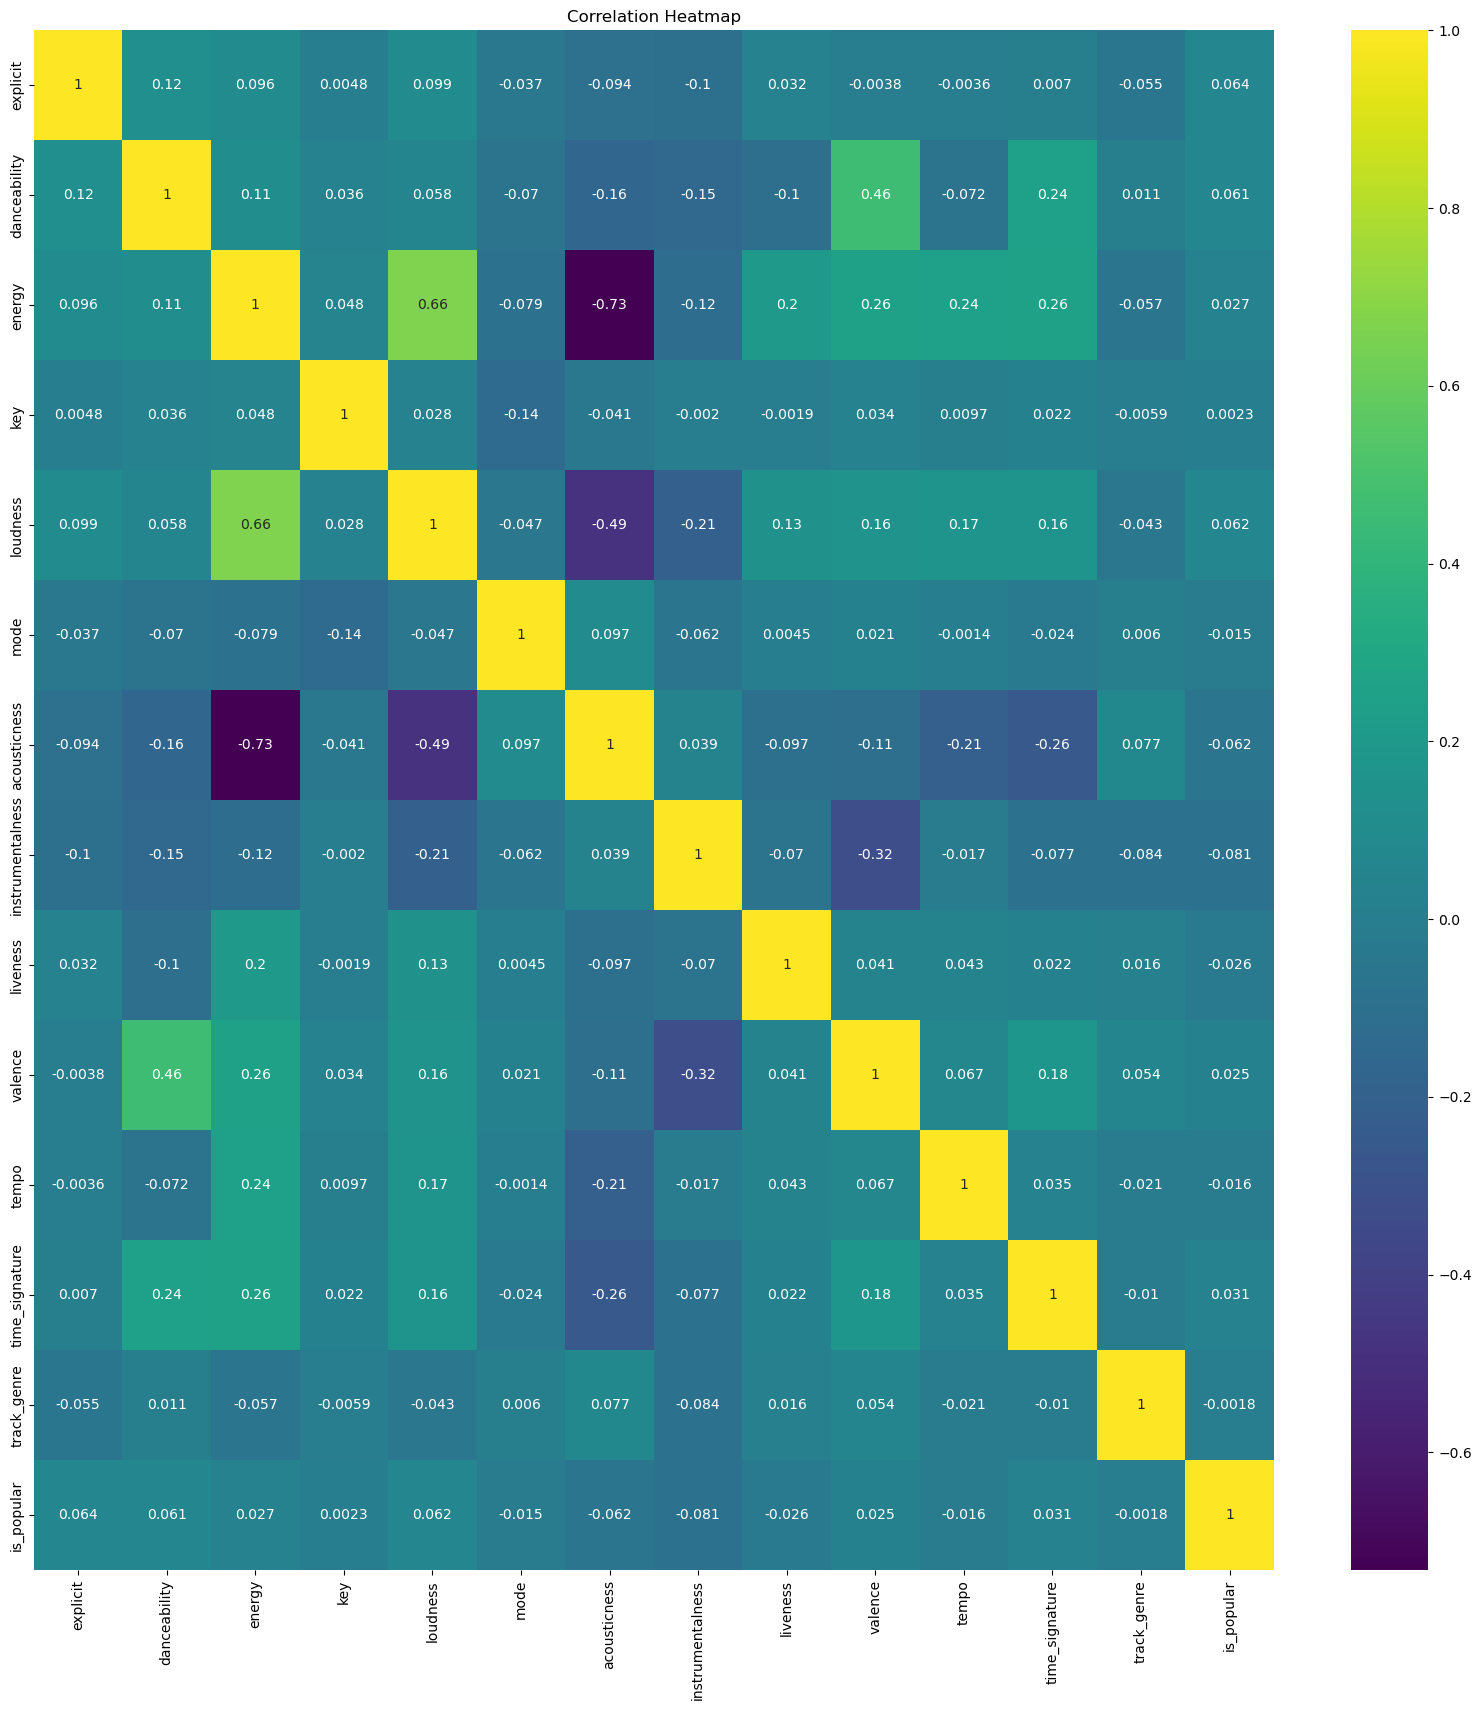

In [50]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [163]:
df["is_popular"].value_counts(normalize=True) * 100

is_popular
0    95.736642
1     4.263358
Name: proportion, dtype: float64

In [164]:
X = df.drop(columns=['is_popular'])  
y = df['is_popular'] 

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

Complete LogisticRegression Training ! 0.9578279905389764
Complete LogisticRegression Test! 0.9562894466461177
Accuracy: 0.9563
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     32576
           1       0.00      0.00      0.00      1489

    accuracy                           0.96     34065
   macro avg       0.48      0.50      0.49     34065
weighted avg       0.91      0.96      0.93     34065



c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



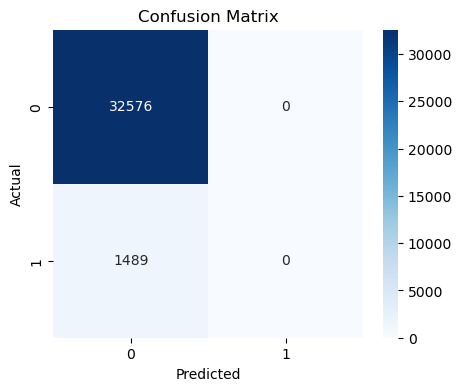

In [ ]:
#first model "LogisticRegression" without any improvement    
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train,y_train)
Tst_score=model.score(X_test,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

🔹 Accuracy (Balanced Logistic Regression): 0.5969
              precision    recall  f1-score   support

           0       0.98      0.59      0.74     32576
           1       0.08      0.73      0.14      1489

    accuracy                           0.60     34065
   macro avg       0.53      0.66      0.44     34065
weighted avg       0.94      0.60      0.71     34065



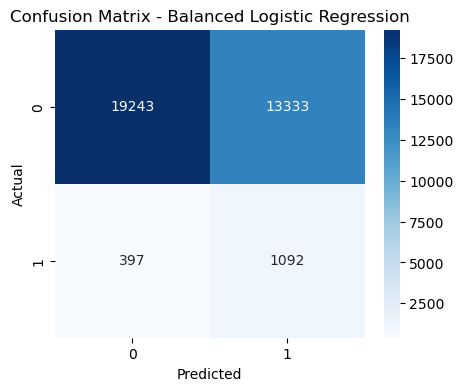

In [ ]:
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy (Balanced Logistic Regression): {accuracy_balanced:.4f}")
print(classification_report(y_test, y_pred_balanced))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.show()


🔹 Accuracy (Logistic Regression after SMOTE): 0.8750
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     32576
           1       0.12      0.28      0.17      1489

    accuracy                           0.88     34065
   macro avg       0.54      0.59      0.55     34065
weighted avg       0.93      0.88      0.90     34065



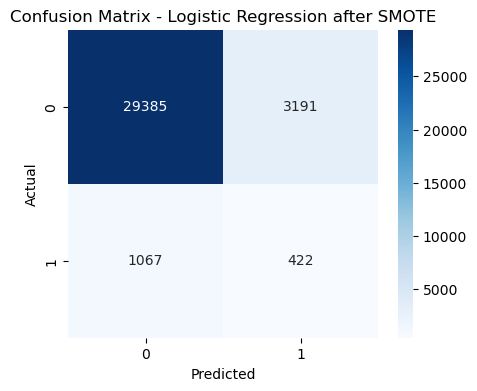

In [ ]:
smote = SMOTE(sampling_strategy=.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


model_smote = LogisticRegression()
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)


accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f" Accuracy (Logistic Regression after SMOTE): {accuracy_smote:.4f}")
print(classification_report(y_test, y_pred_smote))


plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression after SMOTE")
plt.show()


In [ ]:
model_rf = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=10,class_weight="balanced", random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest after SMOTE): {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


In [ ]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model_rf = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=10, 
                                  class_weight="balanced", random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f" Accuracy (Random Forest with reduced SMOTE): {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


 Accuracy (Random Forest with reduced SMOTE): 0.8852
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     32576
           1       0.21      0.58      0.31      1489

    accuracy                           0.89     34065
   macro avg       0.59      0.74      0.62     34065
weighted avg       0.95      0.89      0.91     34065



In [68]:
y_probs = model_rf.predict_proba(X_test)[:, 1] 
threshold = 0.76  
y_pred_adjusted = (y_probs >= threshold).astype(int)

print(f"Accuracy (Random Forest with Adjusted Threshold {threshold}): {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(classification_report(y_test, y_pred_adjusted))


Accuracy (Random Forest with Adjusted Threshold 0.76): 0.9539
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     32576
           1       0.44      0.20      0.27      1489

    accuracy                           0.95     34065
   macro avg       0.70      0.59      0.62     34065
weighted avg       0.94      0.95      0.95     34065



In [ ]:
#second model XGB without any improvements
model2 = XGBClassifier(scale_pos_weight=10, n_estimators=500, max_depth=4, learning_rate=0.03)  
model2.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

# accuracy
y_pred_xgb = model2.predict(X_test)
print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGB Training Accuracy: 0.8992627447033366
XGB Test Accuracy: 0.8946719506825187
XGBoost Accuracy: 0.8946719506825187
Confusion Matrix:
 [[29619  2957]
 [  631   858]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     32576
           1       0.22      0.58      0.32      1489

    accuracy                           0.89     34065
   macro avg       0.60      0.74      0.63     34065
weighted avg       0.95      0.89      0.92     34065



XGBoost Accuracy (after threshold 0.48): 0.7664
Confusion Matrix:
 [[24860  7716]
 [  240  1249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     32576
           1       0.14      0.84      0.24      1489

    accuracy                           0.77     34065
   macro avg       0.56      0.80      0.55     34065
weighted avg       0.95      0.77      0.83     34065



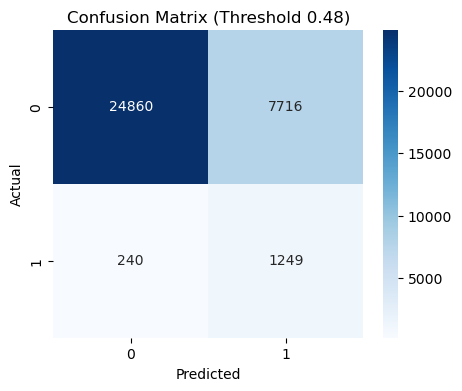

In [ ]:
model_xgb = XGBClassifier(scale_pos_weight=20, n_estimators=1000, max_depth=3, learning_rate=0.03)
model_xgb.fit(X_train, y_train)


y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]

threshold = 0.48
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
class_report = classification_report(y_test, y_pred_adjusted)

print(f"XGBoost Accuracy (after threshold {threshold}): {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold {threshold})")
plt.show()


In [79]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos  


model2 = XGBClassifier(
    n_estimators=200,
    scale_pos_weight = neg / pos, 
    # scale_pos_weight=15,  
    max_depth=2,  
    learning_rate=0.05,    
    random_state=42,
    reg_lambda=20, 
    reg_alpha=10,
    subsample=0.5, 
    colsample_bytree=0.5,
    eval_metric="logloss"
)


model2.fit(
    X_train, 
    y_train, 
    verbose=True
)


y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

test_accuracy = accuracy_score(y_test, model2.predict(X_test))
train_accuracy = accuracy_score(y_train, model2.predict(X_train))

print(f"XGBoost Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("XGBoost Training Accuracy:", train_accuracy)
print("XGBoost Test Accuracy:", test_accuracy)



XGBoost Accuracy: 0.6498165272273595
Confusion Matrix:
[[20955 11621]
 [  308  1181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     32576
           1       0.09      0.79      0.17      1489

    accuracy                           0.65     34065
   macro avg       0.54      0.72      0.47     34065
weighted avg       0.95      0.65      0.75     34065

XGBoost Training Accuracy: 0.9578279905389764
XGBoost Test Accuracy: 0.6498165272273595


In [80]:
model3= BalancedRandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Balanced Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"rf Accuracy: {accuracy}")
print("rf Training Accuracy:", train_accuracy)
print("rf Test Accuracy:", test_accuracy)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.



Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     32576
           1       0.13      0.85      0.23      1489

    accuracy                           0.75     34065
   macro avg       0.56      0.80      0.54     34065
weighted avg       0.95      0.75      0.83     34065

Balanced Random Forest Confusion Matrix:
[[24401  8175]
 [  230  1259]]
rf Accuracy: 0.6498165272273595
rf Training Accuracy: 0.9578279905389764
rf Test Accuracy: 0.6498165272273595


In [81]:
brf = BalancedRandomForestClassifier(n_estimators=400,class_weight="balanced_subsample",max_depth=7, min_samples_split=10, min_samples_leaf=2,random_state=1)
brf.fit(X_train, y_train)
brf_predict = brf.predict(X_test)
brf_test_acc = accuracy_score(y_test, brf_predict)

print("Balanced Random Forest Accuracy:", brf_test_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, brf_predict))

print("rf Training Accuracy:", train_accuracy)
print("rf Test Accuracy:", test_accuracy)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.



Balanced Random Forest Accuracy: 0.6029355643622486
Confusion Matrix:
 [[19321 13255]
 [  271  1218]]
rf Training Accuracy: 0.9578279905389764
rf Test Accuracy: 0.6498165272273595
Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     32576
           1       0.13      0.85      0.23      1489

    accuracy                           0.75     34065
   macro avg       0.56      0.80      0.54     34065
weighted avg       0.95      0.75      0.83     34065



In [86]:
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=1, n_estimators=100, max_depth=10, verbose=-1)
lgb_model.fit(X_train, y_train)
lgb_predict = lgb_model.predict(X_test)


lgb_test_acc = accuracy_score(y_test, lgb_predict)
lgb_cv_mean = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy').mean()


print(f"GBM Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_predict))
print(f"LightGBM CV Mean Accuracy: {lgb_cv_mean:.4f}")
print("Classification Report:\n", classification_report(y_test, lgb_predict))
print("GBM Training Accuracy:", train_accuracy)
print(f"LightGBM Test Accuracy: {lgb_test_acc:.4f}")

GBM Accuracy: 0.686599148686335
Confusion Matrix:
 [[25761  6815]
 [  235  1254]]
LightGBM CV Mean Accuracy: 0.7997
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     32576
           1       0.16      0.84      0.26      1489

    accuracy                           0.79     34065
   macro avg       0.57      0.82      0.57     34065
weighted avg       0.95      0.79      0.85     34065

GBM Training Accuracy: 0.9578279905389764
LightGBM Test Accuracy: 0.7930


🔹 LightGBM Accuracy (after threshold 0.22788256092682377): 0.9252
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     32576
           1       0.33      0.69      0.45      1489

    accuracy                           0.93     34065
   macro avg       0.66      0.82      0.70     34065
weighted avg       0.96      0.93      0.94     34065



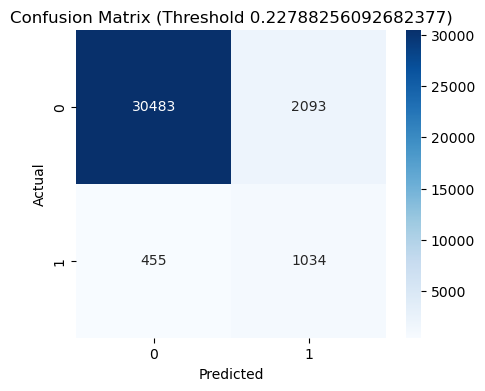

In [ ]:
from lightgbm import LGBMClassifier

scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


model_lgbm = LGBMClassifier(n_estimators=1000,
    learning_rate=0.02,
    max_depth=10,
    num_leaves=50,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0: 1, 1: 3})
model_lgbm.fit(X_train, y_train)


y_probs = model_lgbm.predict_proba(X_test)[:, 1]  


threshold = 0.22788256092682377
y_pred_adj = (y_probs > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_adj)
conf_matrix = confusion_matrix(y_test, y_pred_adj)
class_report = classification_report(y_test, y_pred_adj)

print(f"LightGBM Accuracy (after threshold {threshold}): {accuracy:.4f}")
print("Classification Report:\n", class_report)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold {threshold})")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]  
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores.argmax()]
print("Best Threshold:", best_threshold)

y_pred = (y_probs >= best_threshold).astype(int)


Best Threshold: 0.22788256092682377


C:\Users\arwah\AppData\Local\Temp\ipykernel_17876\2453326370.py:7: RuntimeWarning:

invalid value encountered in divide



In [ ]:
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
gbm_test_acc = accuracy_score(y_test, gbm_predict)

print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
print("Classification Report:\n", classification_report(y_test, gbm_predict))

Gradient Boosting Test Accuracy: 0.9562600910024952
Gradient Boosting Training Accuracy: 0.9579
Gradient Boosting Test Accuracy: 0.9563
Confusion Matrix:
 [[32574     2]
 [ 1488     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     32576
           1       0.33      0.00      0.00      1489

    accuracy                           0.96     34065
   macro avg       0.64      0.50      0.49     34065
weighted avg       0.93      0.96      0.93     34065



In [ ]:



Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=1)


smote = SMOTE(random_state=1)
Xtrain_res, Ytrain_res = smote.fit_resample(Xtrain, Ytrain)


gbm = GradientBoostingClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_res, Ytrain_res)

best_params = grid_search.best_params_
print("أفضل معلمات Gradient Boosting:", best_params)


best_gbm = grid_search.best_estimator_
best_gbm.fit(Xtrain_res, Ytrain_res)


gbm_predict = best_gbm.predict(Xtest)


gbm_test_acc = accuracy_score(Ytest, gbm_predict)
gbm_precision = precision_score(Ytest, gbm_predict)
gbm_recall = recall_score(Ytest, gbm_predict)
gbm_f1 = f1_score(Ytest, gbm_predict)
conf_matrix = confusion_matrix(Ytest, gbm_predict)


print("Gradient Boosting Test Accuracy:", gbm_test_acc)
print("Precision:", gbm_precision)
print("Recall:", gbm_recall)
print("F1-Score:", gbm_f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, cat_features=[], random_seed=42, verbose=200)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


0:	learn: 0.6231719	total: 212ms	remaining: 3m 31s
200:	learn: 0.1053611	total: 6.77s	remaining: 26.9s
400:	learn: 0.0769825	total: 13s	remaining: 19.4s
600:	learn: 0.0606638	total: 20.9s	remaining: 13.8s
800:	learn: 0.0487228	total: 31.4s	remaining: 7.8s
999:	learn: 0.0409387	total: 41.1s	remaining: 0us
Test Accuracy: 0.9653
Confusion Matrix:
 [[27094    58]
 [  926   310]]


In [ ]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek(sampling_strategy=0.5)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


model = CatBoostClassifier(
    iterations=1000,       
    learning_rate=0.05,  
    depth=8,         
    loss_function='Logloss', 
    eval_metric='AUC',  
    class_weights={0: 1, 1: 5}, 
    verbose=200, 
    random_state=42
)


model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test), early_stopping_rounds=50)


y_probs = model.predict_proba(X_test)[:, 1]  


best_threshold = 0.3  
y_pred = (y_probs >= best_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f" CatBoost Accuracy (after threshold {best_threshold}): {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


0:	test: 0.6687870	best: 0.6687870 (0)	total: 40ms	remaining: 40s
200:	test: 0.8067558	best: 0.8067558 (200)	total: 9.11s	remaining: 36.2s
400:	test: 0.8482535	best: 0.8482535 (400)	total: 16.4s	remaining: 24.5s
600:	test: 0.8694553	best: 0.8694654 (599)	total: 24.7s	remaining: 16.4s
800:	test: 0.8802141	best: 0.8802141 (800)	total: 41.6s	remaining: 10.3s
999:	test: 0.8874745	best: 0.8875911 (997)	total: 53.9s	remaining: 0us

bestTest = 0.8875911386
bestIteration = 997

Shrink model to first 998 iterations.
📌 CatBoost Accuracy (after threshold 0.3): 0.8221
Confusion Matrix:
 [[22354  4798]
 [  253   983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     27152
           1       0.17      0.80      0.28      1236

    accuracy                           0.82     28388
   macro avg       0.58      0.81      0.59     28388
weighted avg       0.95      0.82      0.87     28388

